In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("heart_disease_dataset.csv")
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [9]:
df.shape

(1190, 12)

In [11]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [13]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [19]:
# splitting the dataset into features and target variables
x=df.drop('target',axis=1)
y=df['target']

target
1    629
0    561
Name: count, dtype: int64


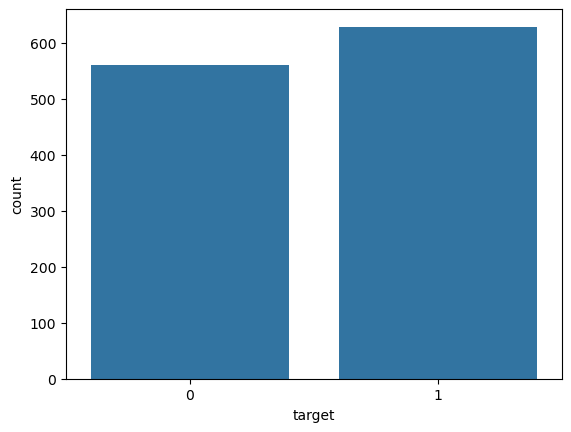

In [21]:
# checking if the target feature is balanced and the plotting
print(df['target'].value_counts())
import seaborn as sns
sns.countplot(x='target',data=df)
plt.show()

In [25]:
# train the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)

In [27]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (892, 11)
X_test: (298, 11)
Y_train: (892,)
Y_test: (298,)


In [46]:
# standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_trainn=sc.fit_transform(x_train)
x_testt=sc.transform(x_test)

## Applying Logistic Regression Algorithm

In [59]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced',penalty='l2',solver='lbfgs',max_iter=1000)
model.fit(x_trainn,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [61]:
model.score(x_testt,y_test)

0.8389261744966443

In [53]:
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(model,x,y,cv=5)
print("Cross validation score accuracy: ",np.mean(cv_scores))
print(cv_scores)

Cross validation score accuracy:  0.8126050420168067
[0.83613445 0.81932773 0.8487395  0.7605042  0.79831933]


In [55]:
y_test

780    1
603    1
597    1
369    1
161    1
      ..
995    1
675    1
226    1
6      0
372    1
Name: target, Length: 298, dtype: int64

In [63]:
y_pred=model.predict(x_testt)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1], dtype=i

In [67]:
new_patient = {
    'age': 54,                 
    'sex': 1,                    
    'chest pain type': 2,        
    'resting bp s': 130,         
    'cholesterol': 250,          
    'fasting blood sugar': 0,    
    'resting ecg': 1,            
    'max heart rate': 160,       
    'exercise angina': 0,        
    'oldpeak': 1.4,              
    'ST slope': 2,               
}
# Convert dict to DataFrame 
new_df = pd.DataFrame([new_patient])

# Transform using scaler
scaled_data = sc.transform(new_df)

# Make prediction
prediction = model.predict(scaled_data)

# diplay result
if prediction[0] == 1:
    print("⚠️ Patient likely has heart disease")
else:
    print("✅ Patient likely does NOT have heart disease")

✅ Patient likely does NOT have heart disease


In [71]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cf)

Confusion Matrix:
 [[119  21]
 [ 27 131]]


In [73]:
# Evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))

Accuracy:  0.8389261744966443
Precision:  0.8618421052631579
Recall:  0.8291139240506329


In [ ]:
labels=classifier.classes_
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cf,annot=True,annot_kws={"size":20},fmt='d',cmap="Bluess",xticklabels=labels,yticklabels=labels,ax=ax)
ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()